Final Results and Training Histories

In [1]:
import os
import matplotlib as mpl
from matplotlib import pyplot as plt
%matplotlib inline
import pickle
import json
import seaborn as sns

In [2]:
cwd = os.getcwd()
ordered_keys = ["0.001","0.002","0.003","0.004","0.005","0.006","0.007","0.008",
                "0.009","0.01","0.011","0.012","0.013", "0.014","0.015"]
variable_keys = ["exploration_fraction", "max_eps", "final_eps", "learning_rate", "target_network_update_freq"]

def dict_to_list(the_dict, ordered_keys):
    output_list = []
    for key in ordered_keys:
        if key in the_dict.keys():
            output_list.append(the_dict[key])
    return output_list

def config_dict_to_string(config_dict, variable_keys):
    base_string = "["
    end = len(variable_keys)
    count = 1
    for key in variable_keys:
        if key in config_dict.keys():
            if count < end:
                if key == "exploration_fraction":
                    if config_dict[key] == 100000:
                        base_string = base_string+"1e5, "
                    else:
                        base_string = base_string+"2e5, "
                else:
                    base_string = base_string+str(config_dict[key])+", "
            else:
                base_string = base_string+str(config_dict[key])+"]"
            count +=1
    return base_string

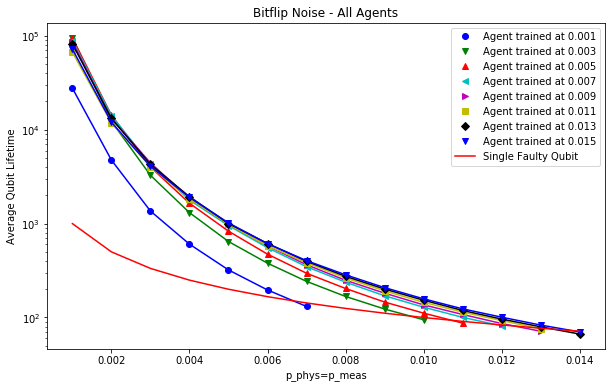

In [3]:
x_folder = os.path.join(cwd,"../trained_models/d5_x/")
x_results_dict = {}
x_training_dict = {}
x_configs_dict = {}

for direct in os.listdir(x_folder):
    if "fixed_config" not in direct:
        path_to_results = os.path.join(x_folder,direct+"/all_results.p")
        path_to_training_history = os.path.join(x_folder,direct+"/training_history.json")

        x_results_dict[direct] = pickle.load( open(path_to_results, "rb" ))
        with open(path_to_training_history) as f:
            history = json.load(f)
        x_training_dict[direct] = history["episode_lifetimes_rolling_avg"]
        
        err_direct = os.path.join(x_folder,direct)
        for f in os.listdir(err_direct):
            if "variable_config" in f:
                path_to_config = os.path.join(err_direct,f)
        x_configs_dict[direct] = config_dict_to_string(pickle.load( open(path_to_config, "rb" )),variable_keys)
        
        
        
ordered_x_results = {}

for key in x_results_dict.keys():
    ordered_x_results[key] = dict_to_list(x_results_dict[key], ordered_keys)
    
colours = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'b']
markers = ["bo","gv","r^","c<","m>","ys", "kD","bv"]
p_phys = [j*0.001 for j in range(1,20)]
bench = [1/p for p in p_phys]

plt.figure(figsize = (10,6))
count = 0
max_l = 0
for key in ordered_keys:
    if key in ordered_x_results.keys():
        if max_l < len(ordered_x_results[key]):
            max_l = len(ordered_x_results[key])
        plt.semilogy(p_phys[:len(ordered_x_results[key])],ordered_x_results[key],colours[count])
        plt.semilogy(p_phys[:len(ordered_x_results[key])],ordered_x_results[key],markers[count], label="Agent trained at "+ key)
        count += 1
                        
plt.semilogy(p_phys[:max_l],bench[:max_l],"r",label="Single Faulty Qubit")
    
plt.title("Bitflip Noise - All Agents")
plt.ylabel("Average Qubit Lifetime")
plt.xlabel("p_phys=p_meas")
plt.legend()
plt.savefig("./Images/bitflip_noise_all_agents")

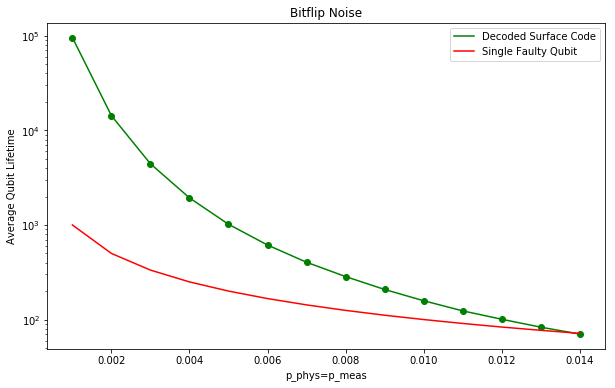

In [4]:
plt.figure(figsize = (10,6))
best_results = []
for j in range(20):
    benchmark = 0
    for agent in ordered_keys:
        if agent in ordered_x_results.keys():
            if len(ordered_x_results[agent]) >= j+1:
                if ordered_x_results[agent][j] > benchmark:
                    benchmark = ordered_x_results[agent][j]
    best_results.append(benchmark)
                
first_zero = best_results.index(0)
best_results = best_results[:first_zero]

plt.semilogy(p_phys[:len(best_results)],best_results,"g", label="Decoded Surface Code")
plt.semilogy(p_phys[:len(best_results)],best_results,"go")                    
plt.semilogy(p_phys[:len(best_results)],bench[:len(best_results)],"r",label="Single Faulty Qubit")
    
plt.title("Bitflip Noise")
plt.ylabel("Average Qubit Lifetime")
plt.xlabel("p_phys=p_meas")
plt.legend()
plt.savefig("./Images/bitflip_noise")

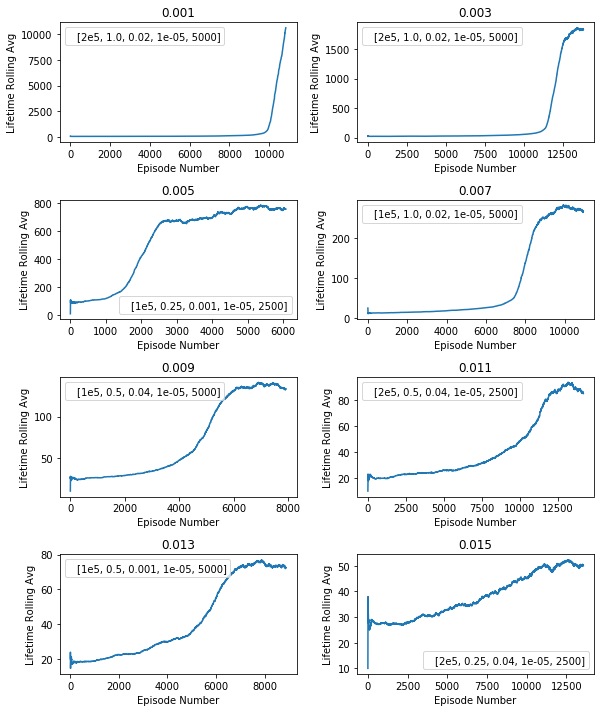

In [5]:
plt.figure(figsize=(8.5,10))
trained_keys = ["0.001","0.003","0.005","0.007","0.009","0.011","0.013", "0.015"]
count = 1
for key in trained_keys:
    plt.subplot(4, 2,count)
    plt.plot(x_training_dict[key],label = x_configs_dict[key] )
    plt.title(key)
    plt.xlabel("Episode Number")
    plt.ylabel("Lifetime Rolling Avg")
    plt.legend(handlelength=0,)
    count +=1
    

plt.tight_layout()
plt.savefig("./Images/bitflip_training")
    

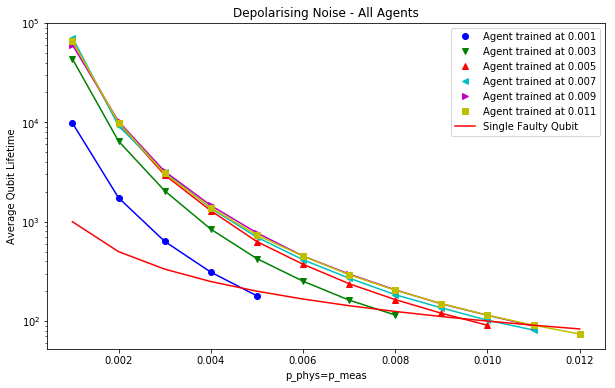

In [6]:
dp_folder = os.path.join(cwd,"../trained_models/d5_dp/")
dp_results_dict = {}
dp_training_dict = {}
dp_configs_dict = {}

for direct in os.listdir(dp_folder):
    if "fixed_config" not in direct:
        path_to_results = os.path.join(dp_folder,direct+"/all_results.p")
        path_to_training_history = os.path.join(dp_folder,direct+"/training_history.json")

        dp_results_dict[direct] = pickle.load( open(path_to_results, "rb" ))
        with open(path_to_training_history) as f:
            history = json.load(f)
        dp_training_dict[direct] = history["episode_lifetimes_rolling_avg"]
        
        err_direct = os.path.join(dp_folder,direct)
        for f in os.listdir(err_direct):
            if "variable_config" in f:
                path_to_config = os.path.join(err_direct,f)
        dp_configs_dict[direct] = config_dict_to_string(pickle.load( open(path_to_config, "rb" )),variable_keys)
        
        
        
ordered_dp_results = {}

for key in dp_results_dict.keys():
    ordered_dp_results[key] = dict_to_list(dp_results_dict[key], ordered_keys)
    
colours = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'b']
markers = ["bo","gv","r^","c<","m>","ys", "kD","bv"]
p_phys = [j*0.001 for j in range(1,20)]
bench = [1/p for p in p_phys]

plt.figure(figsize = (10,6))
count = 0
max_l = 0
for key in ordered_keys:
    if key in ordered_dp_results.keys():
        if max_l < len(ordered_dp_results[key]):
            max_l = len(ordered_dp_results[key])
        plt.semilogy(p_phys[:len(ordered_dp_results[key])],ordered_dp_results[key],colours[count])
        plt.semilogy(p_phys[:len(ordered_dp_results[key])],ordered_dp_results[key],markers[count],label="Agent trained at "+ key)
        count += 1
                        
plt.semilogy(p_phys[:max_l],bench[:max_l],"r",label="Single Faulty Qubit")
    
plt.title("Depolarising Noise - All Agents")
plt.ylabel("Average Qubit Lifetime")
plt.xlabel("p_phys=p_meas")
plt.legend()
plt.savefig("./Images/depolarising_noise_all_agents")

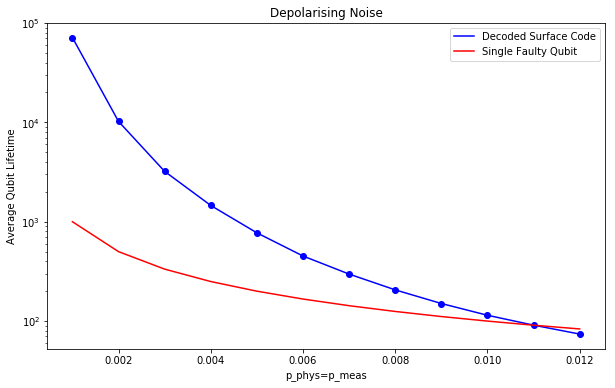

In [7]:
# I want to write something that fetches the combined best results...
plt.figure(figsize = (10,6))
best_results = []
for j in range(20):
    benchmark = 0
    for agent in ordered_keys:
        if agent in ordered_dp_results.keys():
            if len(ordered_dp_results[agent]) >= j+1:
                if ordered_dp_results[agent][j] > benchmark:
                    benchmark = ordered_dp_results[agent][j]
    best_results.append(benchmark)
                
first_zero = best_results.index(0)
best_results = best_results[:first_zero]

plt.semilogy(p_phys[:len(best_results)],best_results,"b", label="Decoded Surface Code")
plt.semilogy(p_phys[:len(best_results)],best_results,"bo")                    
plt.semilogy(p_phys[:len(best_results)],bench[:len(best_results)],"r",label="Single Faulty Qubit")
    
plt.title("Depolarising Noise")
plt.ylabel("Average Qubit Lifetime")
plt.xlabel("p_phys=p_meas")
plt.legend()
plt.savefig("./Images/depolarising_noise")

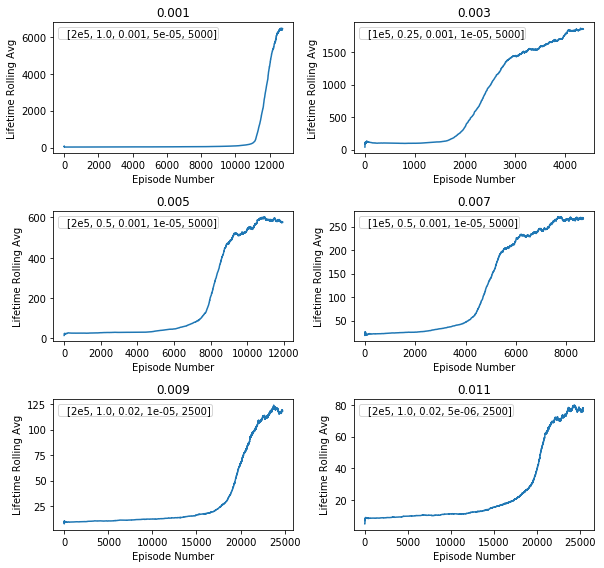

In [8]:
plt.figure(figsize=(8.5,8))
trained_keys = ["0.001","0.003","0.005","0.007","0.009","0.011"]
count = 1
for key in trained_keys:
    plt.subplot(3, 2,count)
    plt.plot(dp_training_dict[key],label = dp_configs_dict[key] )
    plt.title(key)
    plt.xlabel("Episode Number")
    plt.ylabel("Lifetime Rolling Avg")
    #plt.legend(handlelength=0,loc="upper left",framealpha=1)
    plt.legend(handlelength=0,loc="upper left",borderpad=0.1)
    count +=1
    

plt.tight_layout()
plt.savefig("./Images/depolarising_training")
    

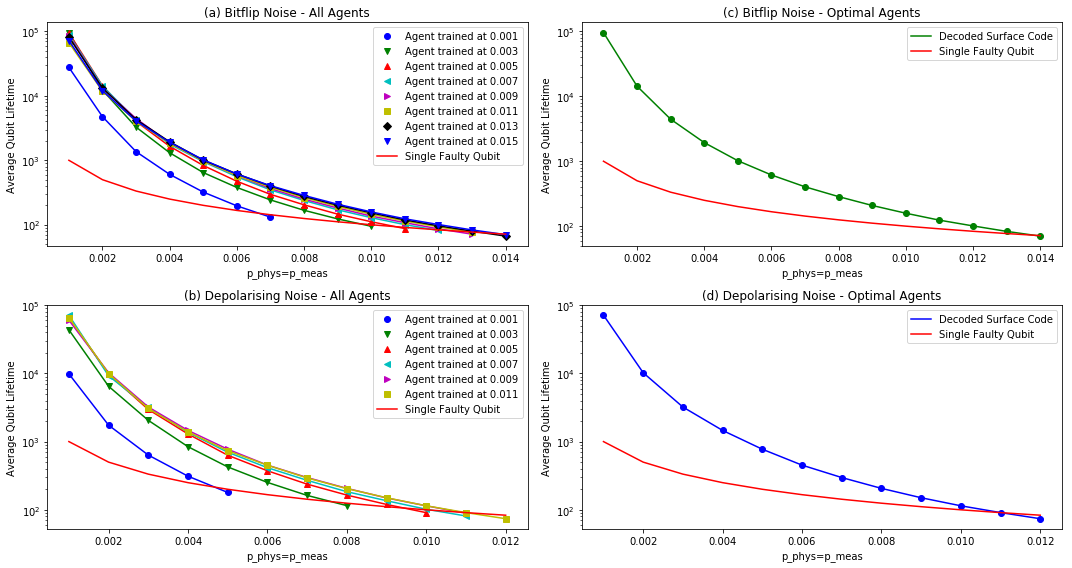

In [9]:
#plt.figure(figsize=(7.057,7.057/1.618))

f = plt.figure()
plt.subplot(2, 2,1)

# plt.rc('xtick', labelsize=8)
# plt.rc('ytick', labelsize=8)
# plt.rc('axes', labelsize=8)

colours = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'b']
markers = ["bo","gv","r^","c<","m>","ys", "kD","bv"]
p_phys = [j*0.001 for j in range(1,20)]
bench = [1/p for p in p_phys]

count = 0
max_l = 0
for key in ordered_keys:
    if key in ordered_x_results.keys():
        if max_l < len(ordered_x_results[key]):
            max_l = len(ordered_x_results[key])
        plt.semilogy(p_phys[:len(ordered_x_results[key])],ordered_x_results[key],colours[count])
        plt.semilogy(p_phys[:len(ordered_x_results[key])],ordered_x_results[key],markers[count], label="Agent trained at "+ key)
        count += 1
                        
plt.semilogy(p_phys[:max_l],bench[:max_l],"r",label="Single Faulty Qubit")
    
plt.title("(a) Bitflip Noise - All Agents")
plt.ylabel("Average Qubit Lifetime")
plt.xlabel("p_phys=p_meas")
plt.legend()

plt.subplot(2, 2,2)
best_results = []
for j in range(20):
    benchmark = 0
    for agent in ordered_keys:
        if agent in ordered_x_results.keys():
            if len(ordered_x_results[agent]) >= j+1:
                if ordered_x_results[agent][j] > benchmark:
                    benchmark = ordered_x_results[agent][j]
    best_results.append(benchmark)
                
first_zero = best_results.index(0)
best_results = best_results[:first_zero]

plt.semilogy(p_phys[:len(best_results)],best_results,"g", label="Decoded Surface Code")
plt.semilogy(p_phys[:len(best_results)],best_results,"go")                    
plt.semilogy(p_phys[:len(best_results)],bench[:len(best_results)],"r",label="Single Faulty Qubit")
    
plt.title("(c) Bitflip Noise - Optimal Agents")
plt.ylabel("Average Qubit Lifetime")
plt.xlabel("p_phys=p_meas")
plt.legend()

plt.subplot(2,2,3)
colours = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'b']
markers = ["bo","gv","r^","c<","m>","ys", "kD","bv"]
p_phys = [j*0.001 for j in range(1,20)]
bench = [1/p for p in p_phys]

count = 0
max_l = 0
for key in ordered_keys:
    if key in ordered_dp_results.keys():
        if max_l < len(ordered_dp_results[key]):
            max_l = len(ordered_dp_results[key])
        plt.semilogy(p_phys[:len(ordered_dp_results[key])],ordered_dp_results[key],colours[count])
        plt.semilogy(p_phys[:len(ordered_dp_results[key])],ordered_dp_results[key],markers[count],label="Agent trained at "+ key)
        count += 1
                        
plt.semilogy(p_phys[:max_l],bench[:max_l],"r",label="Single Faulty Qubit")
    
plt.title("(b) Depolarising Noise - All Agents")
plt.ylabel("Average Qubit Lifetime")
plt.xlabel("p_phys=p_meas")
plt.legend()

plt.subplot(2,2,4)
best_results = []
for j in range(20):
    benchmark = 0
    for agent in ordered_keys:
        if agent in ordered_dp_results.keys():
            if len(ordered_dp_results[agent]) >= j+1:
                if ordered_dp_results[agent][j] > benchmark:
                    benchmark = ordered_dp_results[agent][j]
    best_results.append(benchmark)
                
first_zero = best_results.index(0)
best_results = best_results[:first_zero]

plt.semilogy(p_phys[:len(best_results)],best_results,"b", label="Decoded Surface Code")
plt.semilogy(p_phys[:len(best_results)],best_results,"bo")                    
plt.semilogy(p_phys[:len(best_results)],bench[:len(best_results)],"r",label="Single Faulty Qubit")
    
plt.title("(d) Depolarising Noise - Optimal Agents")
plt.ylabel("Average Qubit Lifetime")
plt.xlabel("p_phys=p_meas")
plt.legend()

f.set_size_inches(15,8)
plt.tight_layout()
plt.savefig("./Images/final_results")

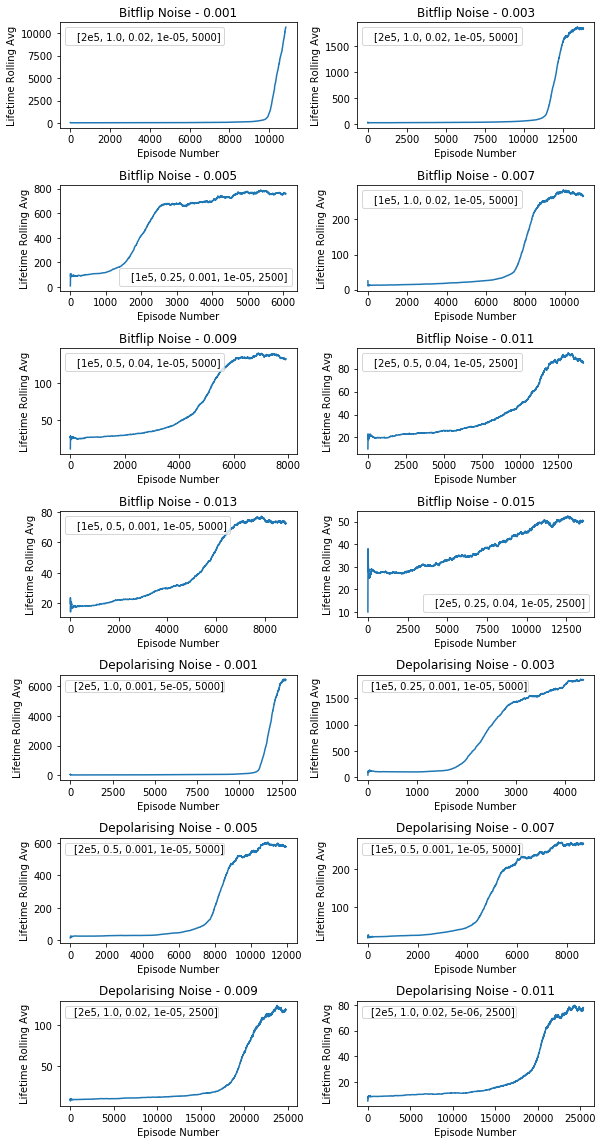

In [10]:
plt.figure(figsize=(8.5,16))
trained_keys = ["0.001","0.003","0.005","0.007","0.009","0.011","0.013", "0.015"]
count = 1
for key in trained_keys:
    plt.subplot(7, 2,count)
    plt.plot(x_training_dict[key],label = x_configs_dict[key] )
    plt.title("Bitflip Noise - "+key)
    plt.xlabel("Episode Number")
    plt.ylabel("Lifetime Rolling Avg")
    plt.legend(handlelength=0,)
    count +=1
    
trained_keys = ["0.001","0.003","0.005","0.007","0.009","0.011"]
for key in trained_keys:
    plt.subplot(7, 2,count)
    plt.plot(dp_training_dict[key],label = dp_configs_dict[key] )
    plt.title("Depolarising Noise - "+key)
    plt.xlabel("Episode Number")
    plt.ylabel("Lifetime Rolling Avg")
    #plt.legend(handlelength=0,loc="upper left",framealpha=1)
    plt.legend(handlelength=0,loc="upper left",borderpad=0.1)
    count +=1
    

plt.tight_layout()
plt.savefig("./Images/training_histories")
    